<a href="https://colab.research.google.com/github/Parthi1212-dotcom/Investment-Portfolio-through-Evolutionary-algorithms/blob/main/All_in_One_Yahoo_Finance_GA_Portfolio_Optimizer_with_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-2636350308.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  12 of 12 completed
/tmp/ipython-input-1-2636350308.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_matrix.fillna(method='ffill', inplace=True)
/tmp/ipython-input-1-2636350308.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_matrix.fillna(method='ffill', inplace=True)
/tmp/ipython-input-1-2636350308.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_matrix.fillna(meth

Data download and cleaning complete.
Calculated annualized returns and covariance matrix.


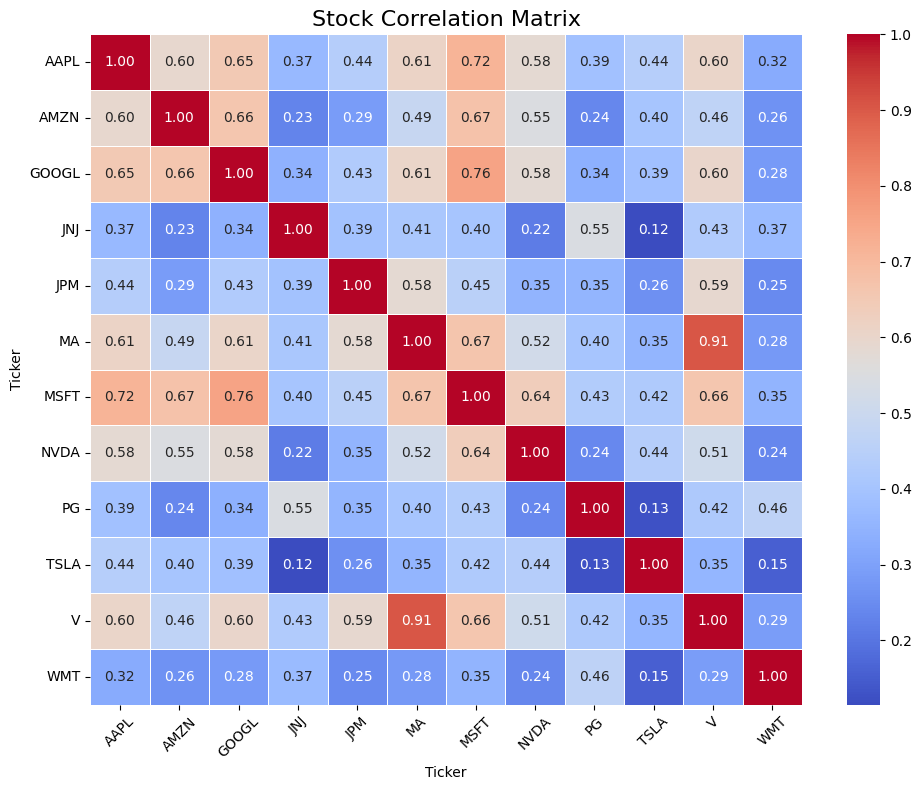


--- Starting Genetic Algorithm ---
Generation 1/50 | Best Sharpe Ratio: 1.2532
Generation 2/50 | Best Sharpe Ratio: 1.2542
Generation 3/50 | Best Sharpe Ratio: 1.2899
Generation 4/50 | Best Sharpe Ratio: 1.2974
Generation 5/50 | Best Sharpe Ratio: 1.3093
Generation 6/50 | Best Sharpe Ratio: 1.3181
Generation 7/50 | Best Sharpe Ratio: 1.3249
Generation 8/50 | Best Sharpe Ratio: 1.3287
Generation 9/50 | Best Sharpe Ratio: 1.3338
Generation 10/50 | Best Sharpe Ratio: 1.3363
Generation 11/50 | Best Sharpe Ratio: 1.3377
Generation 12/50 | Best Sharpe Ratio: 1.3392
Generation 13/50 | Best Sharpe Ratio: 1.3442
Generation 14/50 | Best Sharpe Ratio: 1.3445
Generation 15/50 | Best Sharpe Ratio: 1.3456
Generation 16/50 | Best Sharpe Ratio: 1.3479
Generation 17/50 | Best Sharpe Ratio: 1.3486
Generation 18/50 | Best Sharpe Ratio: 1.3509
Generation 19/50 | Best Sharpe Ratio: 1.3522
Generation 20/50 | Best Sharpe Ratio: 1.3532
Generation 21/50 | Best Sharpe Ratio: 1.3538
Generation 22/50 | Best Shar

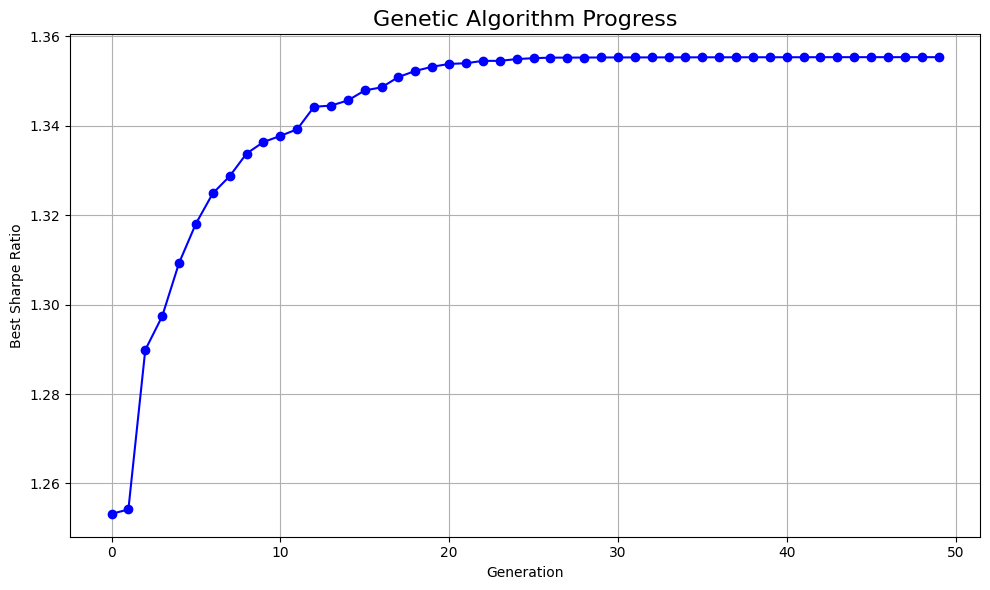


--- Genetic Algorithm Finished ---

Optimal Portfolio Found:
---------------------------------
Annualized Return: 40.09%
Annualized Volatility (Risk): 28.10%
Sharpe Ratio: 1.3553
---------------------------------


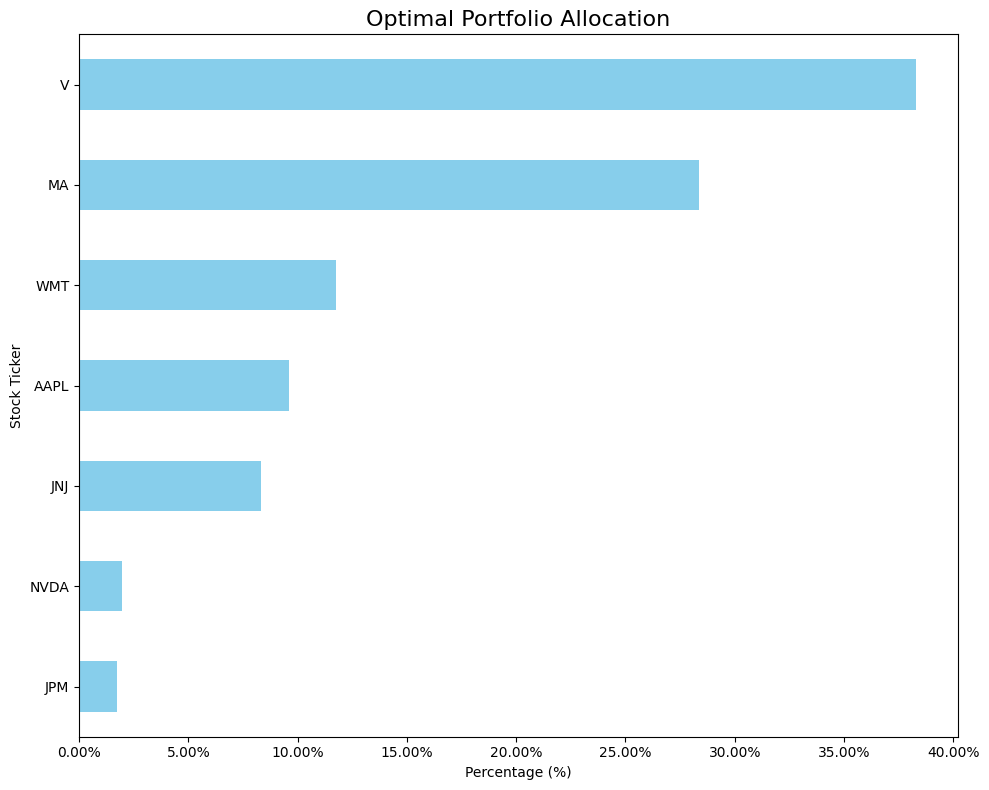


Portfolio Allocation (Precise):
V: 38.29%
MA: 28.35%
WMT: 11.77%
AAPL: 9.58%
JNJ: 8.30%
NVDA: 1.97%
JPM: 1.74%


In [1]:
# First, ensure you have the necessary libraries installed:
# pip install yfinance pandas numpy matplotlib seaborn

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Configuration & Parameters ---

# ==> You can change the list of stocks you want to analyze here.
EQUITY_TICKERS = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA',
    'JPM', 'V', 'JNJ', 'WMT', 'PG', 'MA'
]

# ==> Define the date range for the historical data.
START_DATE = '2016-01-01'
END_DATE = '2023-12-31'

# Genetic Algorithm Parameters
POPULATION_SIZE = 100
NUM_GENERATIONS = 50
MUTATION_RATE = 0.01
TOURNAMENT_SIZE = 5

# Financial Parameters
RISK_FREE_RATE = 0.02

# --- 2. Data Acquisition and Preparation ---

def get_price_data(tickers, start_date, end_date):
    """Downloads historical closing prices from Yahoo Finance."""
    print(f"Downloading historical data for {len(tickers)} equities...")
    data = yf.download(tickers, start=start_date, end=end_date)
    price_matrix = data['Close']
    price_matrix.fillna(method='ffill', inplace=True)
    price_matrix.fillna(method='bfill', inplace=True)
    print("Data download and cleaning complete.")
    return price_matrix

# --- 3. Calculate Financial Inputs ---

def calculate_financial_inputs(price_matrix):
    """Calculates annualized returns and covariance from the price matrix."""
    daily_returns = price_matrix.pct_change().dropna()
    mean_returns = daily_returns.mean()
    annualized_returns = mean_returns * 252
    cov_matrix = daily_returns.cov()
    annualized_cov_matrix = cov_matrix * 252
    print("Calculated annualized returns and covariance matrix.")
    return annualized_returns, annualized_cov_matrix, daily_returns

# --- 4. Genetic Algorithm Core Functions ---

def create_individual(num_tickers):
    """Creates a single random portfolio (an array of weights)."""
    weights = np.random.random(num_tickers)
    return weights / np.sum(weights)

def create_population(pop_size, num_tickers):
    """Creates the initial population of random portfolios."""
    return [create_individual(num_tickers) for _ in range(pop_size)]

def calculate_fitness(weights, mean_returns, cov_matrix, risk_free_rate):
    """Calculates the fitness (Sharpe Ratio) of a single portfolio."""
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    if portfolio_std_dev == 0: return 0
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return sharpe_ratio

def selection(population, fitness_scores):
    """Selects a parent from the population using tournament selection."""
    tournament_indices = np.random.choice(len(population), TOURNAMENT_SIZE, replace=False)
    tournament_fitness = [fitness_scores[i] for i in tournament_indices]
    winner_index = tournament_indices[np.argmax(tournament_fitness)]
    return population[winner_index]

def crossover(parent1, parent2):
    """Creates a child portfolio from two parents using one-point crossover."""
    crossover_point = np.random.randint(1, len(parent1) - 1)
    child_weights = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    return child_weights / np.sum(child_weights)

def mutate(individual, mutation_rate):
    """Applies random mutations to an individual's weights."""
    for i in range(len(individual)):
        if np.random.random() < mutation_rate:
            individual[i] += np.random.uniform(-0.05, 0.05)
            if individual[i] < 0: individual[i] = 0
    return individual / np.sum(individual)

# --- 5. Visualization Functions ---

def plot_correlation_matrix(daily_returns):
    """Plots a heatmap of the correlation matrix."""
    plt.figure(figsize=(10, 8))
    correlation_matrix = daily_returns.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Stock Correlation Matrix', fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def plot_ga_progress(best_fitness_over_time):
    """Plots the improvement of the best fitness score over generations."""
    plt.figure(figsize=(10, 6))
    plt.plot(best_fitness_over_time, marker='o', linestyle='-', color='b')
    plt.title('Genetic Algorithm Progress', fontsize=16)
    plt.xlabel('Generation')
    plt.ylabel('Best Sharpe Ratio')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_portfolio_allocation(weights, tickers):
    """Plots a bar chart of the final portfolio allocation."""
    results = pd.Series(weights, index=tickers)
    results = results[results > 0.001] # Filter out tiny weights
    results.sort_values(ascending=True, inplace=True)

    plt.figure(figsize=(10, 8))
    results.plot(kind='barh', color='skyblue')
    plt.title('Optimal Portfolio Allocation', fontsize=16)
    plt.xlabel('Percentage (%)')
    plt.ylabel('Stock Ticker')
    # Format x-axis as percentage
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.2f}%'))
    plt.tight_layout()
    plt.show()

# --- 6. Main Execution Block ---

if __name__ == '__main__':
    # Step 1: Get Data
    price_matrix = get_price_data(EQUITY_TICKERS, START_DATE, END_DATE)

    # Step 2: Calculate Financial Inputs
    mean_returns, cov_matrix, daily_returns = calculate_financial_inputs(price_matrix)
    num_tickers = len(EQUITY_TICKERS)

    # NEW: Plot correlation matrix
    plot_correlation_matrix(daily_returns)

    # Step 3: Initialize Population
    population = create_population(POPULATION_SIZE, num_tickers)

    print("\n--- Starting Genetic Algorithm ---")

    # NEW: Store best fitness for plotting
    best_fitness_progress = []

    # Step 4: Run Generations
    for gen in range(NUM_GENERATIONS):
        fitness_scores = [calculate_fitness(ind, mean_returns, cov_matrix, RISK_FREE_RATE) for ind in population]

        best_fitness = max(fitness_scores)
        best_fitness_progress.append(best_fitness)

        next_generation = []
        best_index = np.argmax(fitness_scores)
        next_generation.append(population[best_index])

        while len(next_generation) < POPULATION_SIZE:
            parent1 = selection(population, fitness_scores)
            parent2 = selection(population, fitness_scores)
            child = crossover(parent1, parent2)
            child = mutate(child, MUTATION_RATE)
            next_generation.append(child)

        population = next_generation

        print(f"Generation {gen + 1}/{NUM_GENERATIONS} | Best Sharpe Ratio: {best_fitness:.4f}")

    # NEW: Plot GA progress
    plot_ga_progress(best_fitness_progress)

    # Step 5: Display Final Results
    print("\n--- Genetic Algorithm Finished ---")

    final_fitness_scores = [calculate_fitness(ind, mean_returns, cov_matrix, RISK_FREE_RATE) for ind in population]
    best_portfolio_index = np.argmax(final_fitness_scores)
    best_portfolio_weights = population[best_portfolio_index]

    final_return = np.sum(mean_returns * best_portfolio_weights)
    final_std_dev = np.sqrt(np.dot(best_portfolio_weights.T, np.dot(cov_matrix, best_portfolio_weights)))
    final_sharpe = final_fitness_scores[best_portfolio_index]

    print("\nOptimal Portfolio Found:")
    print("---------------------------------")
    print(f"Annualized Return: {final_return:.2%}")
    print(f"Annualized Volatility (Risk): {final_std_dev:.2%}")
    print(f"Sharpe Ratio: {final_sharpe:.4f}")
    print("---------------------------------")

    # NEW: Plot final allocation
    plot_portfolio_allocation(best_portfolio_weights, EQUITY_TICKERS)

    # The text output is still useful for precise numbers
    print("\nPortfolio Allocation (Precise):")
    results = pd.Series(best_portfolio_weights, index=EQUITY_TICKERS)
    results = results[results > 0.001]
    results.sort_values(ascending=False, inplace=True)
    for ticker, weight in results.items():
        print(f"{ticker}: {weight:.2%}")